In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import ast
#from gensim.models import Word2Vec
pd.options.mode.chained_assignment = None

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/alidoxey/Downloads/ted_main.csv")

In [3]:
len(data['main_speaker'].unique())

2156

In [4]:
data.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110


## Ratings

In [5]:
data['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [6]:
ratings = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
           'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
           'Obnoxious', 'Inspiring']

In [7]:
rate = []
def parse(x):
    for ll in range(len(data)):
        splitting = data['ratings'][ll].split(x)
        splitting2 = splitting[1].split(':')
        splitting3 = splitting2[1].split(" ")
        splitting4 = splitting3[1].split("}")
        rate.append(splitting4[0])
        series = pd.Series(rate)
        data[x] = series

In [8]:
for rating in ratings:
    parse(rating)
    rate.clear()

In [9]:
data[ratings].head()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [10]:
data[ratings] = data[ratings].astype(int)

In [11]:
#These are up for debate
#broad_ratings = {'Funny': 'Positive', 'Beautiful':'Positive','Ingenious': 'Positive','Courageous':'Positive',
 #               'Inspiring': 'Positive','Jaw-Dropping': 'Positive', 'Fascinating': 'Positive',
  #              'Longwinded':'Negative','Unconvincing':'Negative','Obnoxious':'Negative', 'Confusing':'Negative',
   #             'Informative': 'Moderate','OK': 'Moderate', 'Persuasive':'Moderate'}
positive = ['Funny','Beautiful','Ingenious','Courageous','Inspiring','Jaw-dropping','Fascinating']
negative = ['Longwinded','Unconvincing','Obnoxious','Confusing']
moderate = ['Informative','OK','Persuasive']

In [12]:
data['Positive'] = data['Funny'] + data['Beautiful'] + data['Ingenious'] + data['Courageous'] + data['Inspiring'] + data['Jaw-dropping'] + data['Fascinating']

In [13]:
data['Negative'] = data['Longwinded'] + data['Unconvincing'] + data['Obnoxious'] + data['Confusing']

In [14]:
data['Moderate'] = data['Informative'] + data['OK'] + data['Persuasive']

In [15]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,Positive,Negative,Moderate
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,10581,300,10704,4439,1174,209,24924,73488,1138,19224
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,132,258,268,116,203,131,413,1458,564,914
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,166,104,230,54,146,142,230,1702,351,771
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,132,36,460,230,85,35,1070,2647,156,925
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,4606,67,2542,3736,248,61,2893,17087,310,8223


## Tags

In [16]:
data['tags'].head()

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
Name: tags, dtype: object

In [17]:
data['tags'][9]

"['Christianity', 'God', 'culture', 'happiness', 'leadership', 'motivation', 'philanthropy', 'religion']"

In [18]:
ast.literal_eval(data['tags'][9])

['Christianity',
 'God',
 'culture',
 'happiness',
 'leadership',
 'motivation',
 'philanthropy',
 'religion']

In [19]:
destring = []
for number in range(len(data)):
    destring.append(ast.literal_eval(data['tags'][number]))
data['Tags'] = pd.Series(destring)

In [20]:
data['Tags'][9]

['Christianity',
 'God',
 'culture',
 'happiness',
 'leadership',
 'motivation',
 'philanthropy',
 'religion']

In [21]:
data['Tags'][9][0]

'Christianity'

In [22]:
data['Tags'][9].count("Christianity")

1

In [23]:
all_tags = []
for items in data['Tags']:
    all_tags.extend(items)

In [24]:
#simplify = {"children":"family","creativity":'','culture':'',"dance":'', "education":'', "parenting":"family",
#            "teaching":'education','alternative energy':'','cars':'','climate change': 'environment',
#            'global issues':'','science':'',}

In [25]:
all_tags = pd.Series(all_tags)
print(len(all_tags.unique()))
unique = all_tags.unique()

416


In [26]:
#This will create a column for each tag indicating that the talk has that tag

"""pd.options.mode.chained_assignment = None
for tags in unique:
    data[tags+'_tag'] = 0
    for item in range(len(data['Tags'])):
        if data['Tags'][item].count(tags) >0:
            data[tags+'_tag'][item] = 1"""

"pd.options.mode.chained_assignment = None\nfor tags in unique:\n    data[tags+'_tag'] = 0\n    for item in range(len(data['Tags'])):\n        if data['Tags'][item].count(tags) >0:\n            data[tags+'_tag'][item] = 1"

### Word2Vec

In [27]:
#model = Word2Vec(destring, min_count=5)

In [28]:
#print(model)

simplify = {"children":"family","creativity":'','culture':'',"dance":'', "education":'', "parenting":"family",
            
            "teaching":'education','alternative energy':'','cars':'','climate change': 'environment',
            
            'global issues':'','science':'',}

In [29]:
#words = list(model.wv.vocab)
#print(words)

print(model['children'])

model.save('model.bin')

model.most_similar('children')

In [30]:
"""
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=5000, random_state=23,learning_rate=1000)
new_values = tsne_model.fit_transform(tokens)

kmeans = KMeans(n_clusters=15)
kmeans.fit(tokens)
clusters = kmeans.predict(tokens)

df_tsne = pd.DataFrame(new_values, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Cluster'] = clusters

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Cluster', fit_reg=False)
plt.title("Tag Clusters")
"""

'\nlabels = []\ntokens = []\n\nfor word in model.wv.vocab:\n    tokens.append(model[word])\n    labels.append(word)\n\ntsne_model = TSNE(perplexity=50, n_components=2, init=\'pca\', n_iter=5000, random_state=23,learning_rate=1000)\nnew_values = tsne_model.fit_transform(tokens)\n\nkmeans = KMeans(n_clusters=15)\nkmeans.fit(tokens)\nclusters = kmeans.predict(tokens)\n\ndf_tsne = pd.DataFrame(new_values, columns=[\'1st_Comp\', \'2nd_Comp\'])\ndf_tsne[\'Cluster\'] = clusters\n\nsns.lmplot(x=\'1st_Comp\', y=\'2nd_Comp\', data=df_tsne, hue=\'Cluster\', fit_reg=False)\nplt.title("Tag Clusters")\n'

In [31]:
#convert = {labels[word]: clusters[word] for word in range(len(labels))}

In [32]:
#convert['God']

## Related Talks

In [33]:
data['related_talks'][0]

'[{\'id\': 865, \'hero\': \'https://pe.tedcdn.com/images/ted/172559_800x600.jpg\', \'speaker\': \'Ken Robinson\', \'title\': \'Bring on the learning revolution!\', \'duration\': 1008, \'slug\': \'sir_ken_robinson_bring_on_the_revolution\', \'viewed_count\': 7266103}, {\'id\': 1738, \'hero\': \'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg\', \'speaker\': \'Ken Robinson\', \'title\': "How to escape education\'s death valley", \'duration\': 1151, \'slug\': \'ken_robinson_how_to_escape_education_s_death_valley\', \'viewed_count\': 6657572}, {\'id\': 2276, \'hero\': \'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg\', \'speaker\': \'Linda Cliatt-Wayman\', \'title\': \'How to fix a broken school? Lead fearlessly, love hard\', \'duration\': 1027, \'slug\': \'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard\', \'viewed_count\': 1617101}, {\'id\': 892, \'hero\': \'https://pe.tedcdn.com/ima

In [34]:
test = ast.literal_eval(data['related_talks'][0])

In [35]:
test[0]

{'duration': 1008,
 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
 'id': 865,
 'slug': 'sir_ken_robinson_bring_on_the_revolution',
 'speaker': 'Ken Robinson',
 'title': 'Bring on the learning revolution!',
 'viewed_count': 7266103}

In [36]:
test[0]['viewed_count']

7266103

In [37]:
data['related_views'] = 0

In [38]:
for ii in range(len(data)):
    less = ast.literal_eval(data['related_talks'][ii])
    related_views = []
    for ll in range(len(less)):
        related_views.append(less[ll]['viewed_count'])
    data['related_views'][ii] = np.mean(related_views)
        

In [39]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,Positive,Negative,Moderate,Tags,related_views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,10704,4439,1174,209,24924,73488,1138,19224,"[children, creativity, culture, dance, educati...",3027062
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,268,116,203,131,413,1458,564,914,"[alternative energy, cars, climate change, cul...",1118767
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,230,54,146,142,230,1702,351,771,"[computers, entertainment, interface design, m...",1846195
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,460,230,85,35,1070,2647,156,925,"[MacArthur grant, activism, business, cities, ...",776189
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,2542,3736,248,61,2893,17087,310,8223,"[Africa, Asia, Google, demo, economics, global...",1907337


## Events

In [40]:
data['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007',
       'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009',
       'Justice with Michael Sandel', 'Business Innovation Factory',
       'TEDxTC', 'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Science Festival', 'BBC TV

In [41]:
data['event_class'] = 'Other'

In [42]:
for ii in range(len(data)):
    if data['event'][ii].count('TED20') >0:
        data['event_class'][ii] = 'Yearly TED Conference'
    elif data['event'][ii].count('TED19') >0:
        data['event_class'][ii] = 'Yearly TED Conference'
    elif data['event'][ii].count('TEDx') >0:
        data['event_class'][ii] = 'TEDx'
    elif data['event'][ii].count('TEDGlobal') >0:
        data['event_class'][ii] = 'TEDGlobal'
    elif data['event'][ii].count('TEDWomen') >0:
        data['event_class'][ii] = 'TEDWomen'
    if data['event'][ii].count('TEDSalon') >0:
        data['event_class'][ii] = 'TEDSalon'
    if data['event'][ii].count('TEDNYC') >0:
        data['event_class'][ii] = 'TEDNYC'
    else:
        pass

In [43]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Jaw-dropping,OK,Obnoxious,Inspiring,Positive,Negative,Moderate,Tags,related_views,event_class
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,4439,1174,209,24924,73488,1138,19224,"[children, creativity, culture, dance, educati...",3027062,Yearly TED Conference
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,116,203,131,413,1458,564,914,"[alternative energy, cars, climate change, cul...",1118767,Yearly TED Conference
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,54,146,142,230,1702,351,771,"[computers, entertainment, interface design, m...",1846195,Yearly TED Conference
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,230,85,35,1070,2647,156,925,"[MacArthur grant, activism, business, cities, ...",776189,Yearly TED Conference
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,3736,248,61,2893,17087,310,8223,"[Africa, Asia, Google, demo, economics, global...",1907337,Yearly TED Conference


## Current Columns of interest:   
 - Comments
 - Duration
 - Film Date / Publish Date
 - Languages
 - Ratings (We may want to combine certain ones to bigger categories)
 - Tags? More work has to be done to consolidate unless we want 400 dummy variables. May not be too bad.
 - Mean # of Related video views
 - Event Class
 - Speaker Occupation? Worth it?


# Visualization

In [44]:
data['Fascinating'] = data['Fascinating'].astype(int)

Text(0.5,0,'Views of Video')

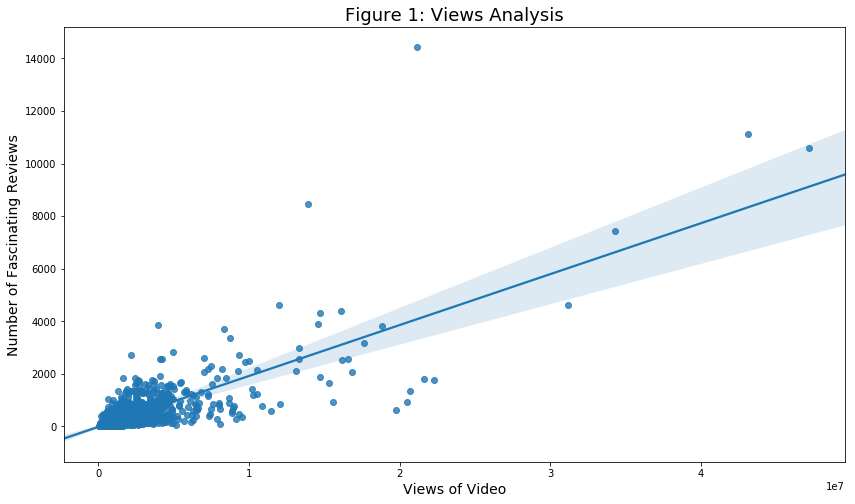

In [45]:
f, ax = plt.subplots(figsize = (14,8))
sns.regplot(x="views", y="Fascinating", data=data)
plt.title("Figure 1: Views Analysis", fontsize = 18)
plt.ylabel("Number of Fascinating Reviews", fontsize = 14)
plt.xlabel("Views of Video", fontsize = 14)

### Event Class

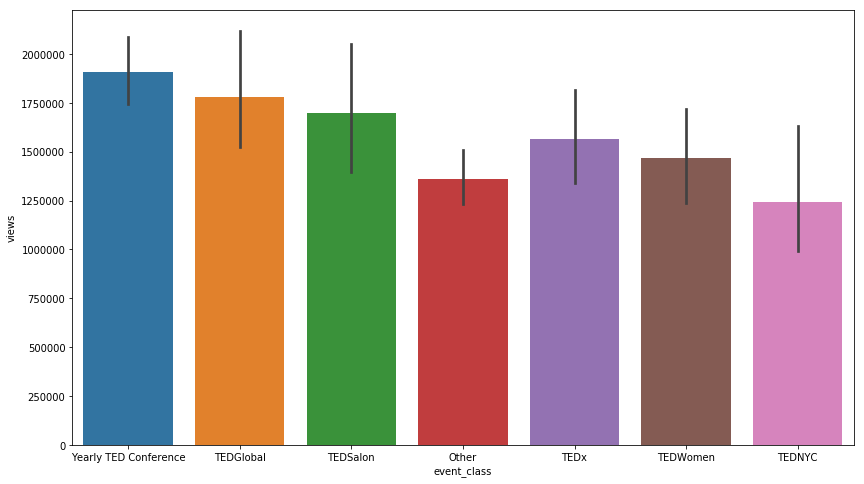

In [46]:
f, ax = plt.subplots(figsize = (14,8))
sns.barplot(x="event_class", y="views", data=data)

### Related_Views

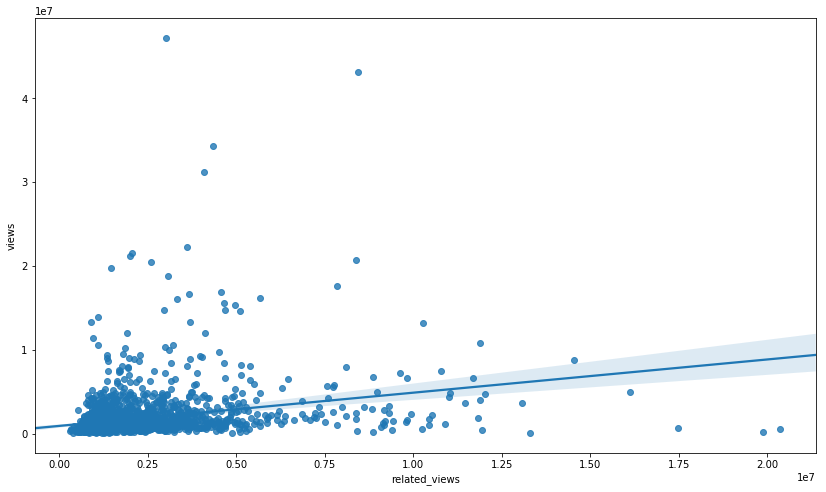

In [47]:
f, ax = plt.subplots(figsize = (14,8))
sns.regplot(x="related_views", y="views", data=data)

# My stuff starts here

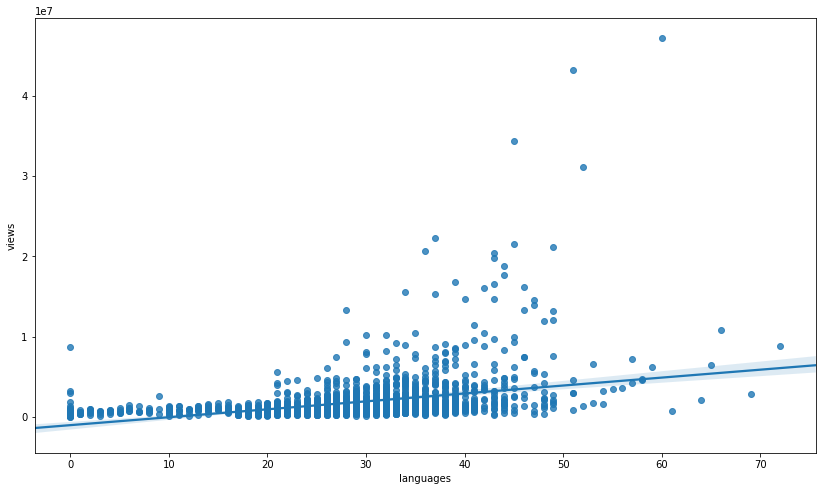

In [49]:
f, ax = plt.subplots(figsize = (14,8))
sns.regplot(x='languages', y="views", data=data)

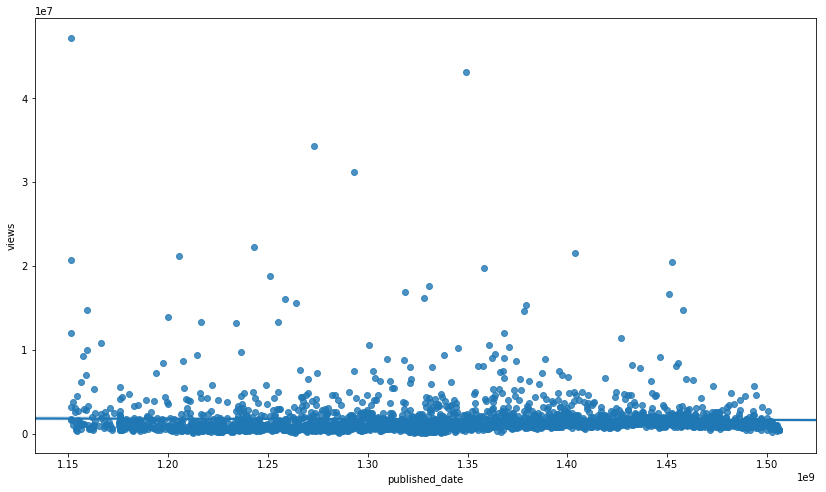

In [50]:
f, ax = plt.subplots(figsize = (14,8))
sns.regplot(x="published_date", y="views", data=data)

## Removing Outliers

In [56]:
#this graph makes it look like there's no correlation between day posted and number of views-- 
#probably not actually the case. So we should try taking out outliers
data2 = pd.DataFrame(data)

In [58]:
mean = numpy.mean(data, axis=0)

NameError: name 'numpy' is not defined

In [57]:
data2['published_date'] = [x for x in data['published_date'] if [(x > x.published_date.mean() - 2 * sd) or (x < x.published_date.mean() + 2 * sd)]]
#data2['views'] = [x for x in data['views'] if [(x > mean - 2 * sd) or (x < mean + 2 * sd)]]

AttributeError: 'numpy.int64' object has no attribute 'published_date'

In [52]:
f, ax = plt.subplots(figsize = (14,8))
sns.regplot(x="published_date", y="views", data=data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 37 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
Funny                 2550 non-null int64
Beautiful             2550 non-null int64
Ingenious             2550 non-null int64
Courageous            2550 non-null int64
L

## Preparing cleaned_data.csv for modeling

In [59]:
data = pd.read_csv("/Users/alidoxey/Downloads/213Project-master 4/cleaned_data.csv")

In [60]:
data.head()

,Unnamed: 0,comments,duration,languages,published_date,speaker_occupation,title,views,Positive,Negative,...,Scientific Fields_tag,media/entertainment_tag,Organizing/Perceiving Information_tag,Middle East_tag,Epidemics_tag,Outer-Space_tag,Vices/Prejudices_tag,exploration_tag,robots/prosthetics_tag,animals/organisms_tag
0,0,4553,1164,60,1151367060,Author/educator,Do schools kill creativity?,47227110,91538,1138,...,0,0,0,0,0,0,0,0,0,0
1,1,265,977,43,1151367060,Climate advocate,Averting the climate crisis,3200520,2169,564,...,1,0,0,0,0,0,0,0,0,0
2,2,124,1286,26,1151367060,Technology columnist,Simplicity sells,1636292,2327,351,...,0,1,1,0,0,0,0,0,0,0
3,3,200,1116,35,1151367060,Activist for environmental justice,Greening the ghetto,1697550,3487,156,...,0,0,0,0,0,0,0,0,0,0
4,4,593,1190,48,1151440680,Global health expert; data visionary,The best stats you've ever seen,12005869,25062,310,...,1,1,1,1,0,0,0,0,0,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 28 columns):
Unnamed: 0                               2550 non-null int64
comments                                 2550 non-null int64
duration                                 2550 non-null int64
languages                                2550 non-null int64
published_date                           2550 non-null int64
speaker_occupation                       2544 non-null object
title                                    2550 non-null object
views                                    2550 non-null int64
Positive                                 2550 non-null int64
Negative                                 2550 non-null int64
Moderate                                 2550 non-null int64
related_views                            2550 non-null int64
event_class                              2550 non-null object
Humanity/Progress_tag                    2550 non-null int64
arts/creativity_tag                 

In [74]:
target = data.views

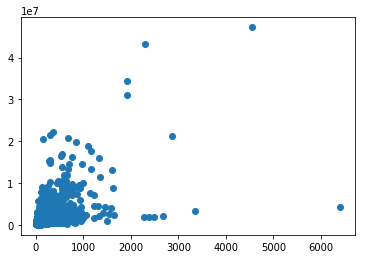

In [75]:
plt.scatter(data.comments, target)

In [80]:
df = data.drop(['speaker_occupation', 'title'], axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 2549
Data columns (total 26 columns):
Unnamed: 0                               2544 non-null int64
comments                                 2544 non-null int64
duration                                 2544 non-null int64
languages                                2544 non-null int64
published_date                           2544 non-null int64
views                                    2544 non-null int64
Positive                                 2544 non-null int64
Negative                                 2544 non-null int64
Moderate                                 2544 non-null int64
related_views                            2544 non-null int64
event_class                              2544 non-null object
Humanity/Progress_tag                    2544 non-null int64
arts/creativity_tag                      2544 non-null int64
philanthropy/religion_tag                2544 non-null int64
music_tag                             

In [83]:
df = pd.get_dummies(df)

In [84]:
df.head()

,Unnamed: 0,comments,duration,languages,published_date,views,Positive,Negative,Moderate,related_views,...,exploration_tag,robots/prosthetics_tag,animals/organisms_tag,event_class_Other,event_class_TEDGlobal,event_class_TEDNYC,event_class_TEDSalon,event_class_TEDWomen,event_class_TEDx,event_class_Yearly TED Conference
0,0,4553,1164,60,1151367060,47227110,91538,1138,1174,3027062,...,0,0,0,0,0,0,0,0,0,1
1,1,265,977,43,1151367060,3200520,2169,564,203,1118767,...,0,0,0,0,0,0,0,0,0,1
2,2,124,1286,26,1151367060,1636292,2327,351,146,1846195,...,0,0,0,0,0,0,0,0,0,1
3,3,200,1116,35,1151367060,1697550,3487,156,85,776189,...,0,0,0,0,0,0,0,0,0,1
4,4,593,1190,48,1151440680,12005869,25062,310,248,1907337,...,0,0,0,0,0,0,0,0,0,1


In [76]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

## Linear Regression

In [86]:
#Basic Linear Regression
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 1699.8737050174086


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2, random_state=42)

In [91]:
#Linear Regression with Grid Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3]}

linear_regression_model = SGDRegressor(tol=.0001)

grid_search = GridSearchCV(linear_regression_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Negative MSE: {}".format(grid_search.best_score_))

/Users/alidoxey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/alidoxey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/alidoxey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/alidoxey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarni

Best Parameters: {'eta0': 0.003}
Best Negative MSE: -2318739.0759285716
